In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as figure
import seaborn as sns  # you might not have this installed -- it makes graphs prettier and sometimes easier
# %matplotlib inline 
import umap
import tldextract
from sklearn.preprocessing import StandardScaler
import pandas as pd
import publicsuffixlist as psl
import os
from tqdm import tqdm_notebook
from sklearn import preprocessing

In [2]:
another_data_part = pd.read_parquet("data_20180705.parquet", engine= "fastparquet")

In [3]:
another_data_part['pd_ts'] = pd.to_datetime(another_data_part.timestamp, unit='s')  # leave off the unit='s' and your dates will be wrong
# another_data_part = another_data_part.set_index('pd_ts').sort_index()
another_data_part['date'] = another_data_part['pd_ts'].dt.date

In [4]:
another_data_part


,timestamp,qname,qip,rip,rcode,qtype,domain,ancount,pd_ts,date
0,1530751756,americanexpress.com.,68.105.28.204,96.7.49.65,0,1,americanexpress.com,1,2018-07-05 00:49:16,2018-07-05
1,1530751758,cits-tracking-prod.americanexpress.com.,68.105.28.44,193.108.91.57,0,28,americanexpress.com,0,2018-07-05 00:49:18,2018-07-05
2,1530751743,americanexpress.com.,77.88.56.68,193.108.91.57,0,1,americanexpress.com,1,2018-07-05 00:49:03,2018-07-05
3,1530751761,internal.airbnb.com.,77.88.56.80,198.51.44.72,3,1,airbnb.com,0,2018-07-05 00:49:21,2018-07-05
4,1530751785,origin-pqgemapp.americanexpress.com.,68.105.28.45,193.108.91.57,0,28,americanexpress.com,0,2018-07-05 00:49:45,2018-07-05
5,1530751795,www.help.tinder.com.,68.105.28.140,205.251.197.203,0,1,tinder.com,1,2018-07-05 00:49:55,2018-07-05
6,1530751796,tinder.com.,68.105.28.140,205.251.197.203,0,1,tinder.com,4,2018-07-05 00:49:56,2018-07-05
7,1530751764,airbnb.com.,10.0.9.147,192.5.5.241,0,43,airbnb.com,0,2018-07-05 00:49:24,2018-07-05
8,1530751747,o14.email.airbnb.com.,68.105.29.78,198.51.45.8,0,1,airbnb.com,1,2018-07-05 00:49:07,2018-07-05
9,1530751766,api.airbnb.com.,77.88.56.64,162.88.2.12,0,28,airbnb.com,1,2018-07-05 00:49:26,2018-07-05


In [297]:
another_data_part['date'] = another_data_part['date'].astype('str')

In [298]:
another_data_part['date'].value_counts()

2018-08-01    4550544
2018-08-02     204589
Name: date, dtype: int64

In [5]:
another_data_part.domain.value_counts()

airbnb.com             1577304
mheginc.com            1454389
tinder.com              991028
americanexpress.com     791435
withairbnb.com          477711
Name: domain, dtype: int64

In [312]:
dataAttackdate = another_data_part[another_data_part['date'] == '2018-08-01']

In [313]:
dataAttackdate

,timestamp,qname,qip,rip,rcode,qtype,domain,ancount,pd_ts,date
0,1533097636,imap.telstra.com.,77.88.56.143,144.135.135.17,0,1,telstra.com,0,2018-08-01 04:27:16,2018-08-01
1,1533097639,workbench.uberinternal.com.,68.105.28.45,204.74.111.126,0,28,uberinternal.com,1,2018-08-01 04:27:19,2018-08-01
2,1533097624,www.ebay-kleinanzeigen.de.,77.88.56.78,194.50.69.18,0,28,ebay-kleinanzeigen.de,0,2018-08-01 04:27:04,2018-08-01
3,1533097635,cla-bpe-f5.email.telstra.com.,77.88.56.70,144.135.133.76,0,1,telstra.com,0,2018-08-01 04:27:15,2018-08-01
4,1533097671,imap.telstra.com.,77.88.56.142,203.36.172.101,0,1,telstra.com,1,2018-08-01 04:27:51,2018-08-01
5,1533097635,imap.telstra.com.,77.88.56.136,203.36.172.101,0,1,telstra.com,1,2018-08-01 04:27:15,2018-08-01
6,1533097622,3.ab.rcs.connect.telstra.com.,68.105.28.204,144.135.135.12,0,1,telstra.com,1,2018-08-01 04:27:02,2018-08-01
7,1533097622,_sips._tcp.a0.rcs.connect.telstra.com.,68.105.28.204,144.135.135.17,0,33,telstra.com,6,2018-08-01 04:27:02,2018-08-01
8,1533097689,mobileservices.telstra.com.,77.88.56.14,192.35.51.30,0,1,telstra.com,0,2018-08-01 04:28:09,2018-08-01
9,1533097721,api.ebay-kleinanzeigen.de.,77.88.56.5,204.13.250.13,0,1,ebay-kleinanzeigen.de,1,2018-08-01 04:28:41,2018-08-01


In [319]:
resolvedPrefixes = pd.read_csv('ResolvedPRefixes_total.csv')
resolvedPrefixes.columns = ['prefixes']

In [320]:
resolvedPrefixes_new = pd.read_csv('ResolvedPRefixes_new.csv')
resolvedPrefixes_new.columns = ['prefixes']

In [321]:
resolved = pd.Series(resolvedPrefixes['prefixes']).tolist()

In [322]:
resolved_new = pd.Series(resolvedPrefixes_new['prefixes']).tolist()

In [323]:
mergelist_resolved = []
mergelist_resolved.extend(resolved)
mergelist_resolved.extend(resolved_new)

In [324]:
resolved_new = list(set(mergelist_resolved))

In [325]:
resolved_new = [incom for incom in resolved_new if str(incom) != 'nan']

In [317]:
subdomains = []

# for dom in dataAttackRemotlyAnwhere['qname']:
for dom in dataAttackdate['qname']:
    labels = tldextract.extract(dom)
    if labels.subdomain != "":
        subdomains.append(labels.subdomain)

In [326]:
# malicious = dataAttackdate.prefix.values

len(resolved_new)

1798303

In [327]:
malicious = list(set(subdomains))

In [328]:
printlist = [x for x in malicious]
printlist

['vi.13717',
 'artifactory-dev.152-178',
 '2010yayunhuinvpaijuesai.envoy.eastus2.prod',
 '198-100.eastus2.envoy.qa',
 'gallery.batman.dev-111176',
 'booska1.acquiring.uat',
 'appdash14-144',
 'ath-blaster-6',
 'babes.uat',
 '1125942316b9183-jarvis',
 '13509.3',
 'sla113-226',
 '1010teisuiyu-net-13dev',
 'd3-109-227',
 '137-129-heroesofhope.ng1.dev',
 '106-243.www.dc.dev',
 'beijingdaxingyulecheng.vault.dev',
 'datatiers',
 '254-247.guardians-test.eastus2.dev',
 'latest.reno.dev-147-84',
 'airspace.11p2g9h9g9lq3v3z123',
 'latin-xxp42.12.dev101-148',
 'cs6.fly.dev.137-255',
 'sub-166-239-200.guardians-test.eastus2.dev',
 '12betwanguomei-hailstorm-dca1',
 'getitdone',
 'tharp',
 'lookingforprogrammers',
 'ldap-aws-us-east-1a.dc.dev-1-158',
 'beanbag.11977',
 '10d82.brasil',
 '10257geofencer',
 'h.14f15',
 '14320pravda-sjc1',
 'bolina',
 'sni102810',
 '224-201.envoy.eastus2.dev',
 '61418543379.mobile',
 '10ea5.usearch-dev',
 '2015.dev1.vpn.skarml.dev.128-220',
 '143-122-hipchat',
 'sun-128

In [329]:
len(malicious)

4055025

In [289]:
import random
random.shuffle(malicious)

In [330]:
malicious = malicious[:1798303]
# resolved_new = resolved_new[:117817]

In [331]:
def common_member(a, b): 
      
    a_set = set(a) 
    b_set = set(b) 
      
    # check length  
    if len(a_set.intersection(b_set)) > 0: 
        return(a_set.intersection(b_set))   
    else: 
        return("no common elements") 

In [332]:
common = common_member(malicious, resolved_new)
len(common)

21518

In [333]:
list(common)

['cdn3-doctissimo',
 'www.international',
 'www.23',
 'gm-res.srv',
 'most3',
 'allthat',
 'dev.www',
 'www.main',
 'auction2',
 'oms',
 'cdn-lp',
 'imgusr',
 'web10339',
 'diyphotography',
 'domodi',
 'ath-blaster-6',
 'vitality',
 'cvp1.cdn',
 'duke',
 'gabg.hit',
 'tehran',
 'shamanic',
 'internal2',
 'regex',
 'clearwater',
 'dc593',
 'ed',
 'dag01',
 'san1',
 'www.rs',
 'habit',
 'maeve',
 'baco',
 'i1-rnsec',
 's220',
 'dossiers',
 'cr',
 'bangalore',
 'time3',
 'daiya',
 'proect',
 'rapid',
 'ilovegrowing',
 'getitdone',
 'control.app05-01',
 'tao',
 'next',
 'web48',
 'jmco',
 '52.prod',
 'blazblue',
 'covers.cdn',
 'ehealth',
 'www.hr',
 'd2l',
 'midia',
 'webrtc.vc',
 'pcdn1',
 'sfpbx',
 'willem',
 'srv069',
 'eesti',
 'www.start',
 'challenge.api',
 'app-community',
 'plata',
 'researchnetwork',
 'n',
 'candy.com.tampa',
 'm06',
 'tes4',
 'kaname',
 'arp1',
 'julie',
 'efm',
 'hot3',
 'cgmbologna',
 'jfsc',
 'gonaturalenglish',
 'mogg',
 'walt',
 'core4',
 'cis1',
 'mediaser

In [57]:
updated_malicious = pd.DataFrame(columns = ['qname', 'label'])

In [58]:
updated_malicious['qname'] = malicious

In [59]:
updated_malicious

,qname,label
0,z7yo48pb02qxvl8tugrwpl072bzd6uu,NaN
1,pw81-217,NaN
2,pw8-8-4-18,NaN
3,pw-93-823,NaN
4,a1fvjgwojporolz6-3i-j1zh6rr652w,NaN
5,k7ic,NaN
6,phb9,NaN
7,pw9120-6-1,NaN
8,9wy0wdo1ct1b06wp21j6izkujvt7x-n,NaN
9,c46q,NaN


In [21]:
updated_malicious['label'] = 1

In [22]:
non_malicious = pd.DataFrame(columns = ['qname', 'label'])

In [23]:
non_malicious['qname'] = resolved_new

In [24]:
non_malicious['label'] = 0

In [25]:
df_s = [updated_malicious, non_malicious]
final_df = pd.concat(df_s)

In [26]:
len(final_df)

3020090

In [27]:
final_df = final_df.sample(frac=1)

In [28]:
final_df['bigramPref'] = ["^{0}$".format(row['qname']) for i, row in final_df.iterrows()] 

In [29]:
final = final_df.copy()

In [30]:
final['qname'] = final['qname'].astype('str')

In [31]:
final['bigramPref'] = final['bigramPref'].astype('str')

In [32]:
pref_len = [len(row['qname']) for i,row in final.iterrows()]
final['pref_len'] = pref_len

In [33]:
XAll = final[['bigramPref','pref_len','qname']]
target = final[['label']]

In [34]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from scipy.sparse import hstack
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import roc_curve, auc,roc_auc_score

In [35]:
qname_train, qname_test, label_train, label_test = train_test_split(XAll, target, test_size=0.2, random_state = 237)

In [36]:
vectorizer = CountVectorizer(analyzer='char', ngram_range=(2, 2))
X_train = vectorizer.fit_transform(qname_train['bigramPref'])
X_train

<2416072x1612 sparse matrix of type '<class 'numpy.int64'>'
	with 39772541 stored elements in Compressed Sparse Row format>

In [37]:
combined_train_X = hstack((X_train ,np.array(qname_train['pref_len'])[:,None])).tocsr()

In [38]:
X_test = vectorizer.transform(qname_test['bigramPref'])

In [39]:
combined_test_X = hstack((X_test,np.array(qname_test['pref_len'])[:,None])).tocsr()

C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


0.8710286779533061
0.9500281240746574


C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8212040038541898
0.9172307416907762


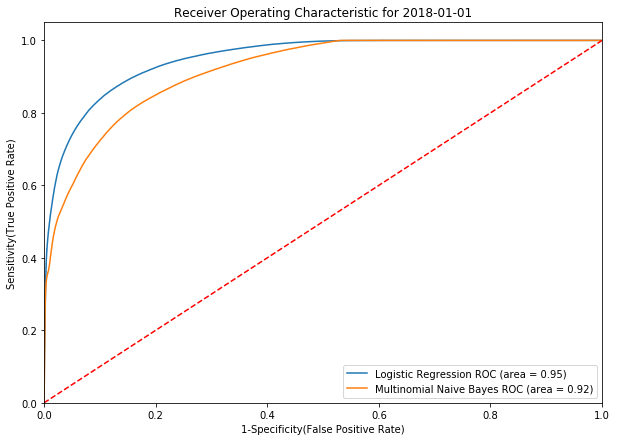

In [40]:
plt.figure(figsize=(10,7))
models = [
{
    'label': 'Logistic Regression',
    'model': LogisticRegression(solver= 'saga'),
},
{
    'label': 'Multinomial Naive Bayes',
    'model': MultinomialNB(alpha= 0.001),
}
]

# Below for loop iterates through your models list
for m in models:
    model = m['model'] # select the model
    model.fit(combined_train_X, label_train) # train the model
    y_pred=model.predict(combined_test_X) # predict the test data
    print(accuracy_score(label_test ,y_pred))
# Compute False postive rate, and True positive rate
    y_prob = model.predict_proba(combined_test_X)[:,1]
    fpr, tpr, thresholds = roc_curve(label_test, y_prob)
# Calculate Area under the curve to display on the plot
    auc = roc_auc_score(label_test, y_prob)
    print(auc)
# Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))
# Custom settings for the plot 

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic for mgh')
plt.legend(loc="lower right")
plt.show()   # Display